# Importación de datos

In [1]:
#Importar las librerias que se utilizarán
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
import numpy as np
from pySankey.sankey import sankey
import matplotlib.pyplot as plt
%matplotlib inline

#Cargar archivo con todos los datos
datos = pd.read_csv('Datos_Reformados.txt', sep=',')

# Determinar la cantidad de clusters
Ahora que ya tenemos los datos a analizar, podemos empezar a buscar el número de clusters óptimos.
Para hacer esto haremos uso de diferentes técnicas que nos ayudarán a tomar una decisión, entre las técnicas que emplearemos podemos encontrar:
- Codo de Jambú
- Coeficiente de Silueta

también existen otros métodos como:
- Índice de Dunn
- Davies - Bouldin Index

Pero es mejor no utilizarlos, pues solo sirven para casos en donde la agrupación de los datos es muy marcada y densa. 

> **Aclaración**: Debido a que el modo de inicialización que tiene por defecto el método de K-means clustering es poco óptimo, he decidido hacer uso del algoritmo de inicialización K-means++

### Primero empezamos aplicando la técnica del codo de Jambú para ir reduciendo el rango de elección

In [2]:
# Creamos una lista que guardará todos los valores de WCSS 
#(Éste es la suma de los cuadrados de las distancias de cada punto de datos en todos los grupos con respecto a sus centroides)
wcss = []

#Bucle que se encargará de probar los con diferentes cantidades de clusters
for i in range(10, 70,2):
   modelo_prueba = KMeans(n_clusters = i, init = 'k-means++', random_state = 150).fit(datos)
   #Añadir el valor de wcss a la lista
   wcss.append(modelo_prueba.inertia_)

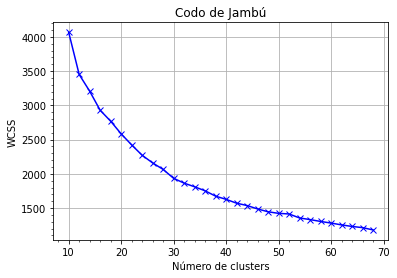

In [3]:
#Graficar los datos de la técnica del codo de Jambú 
plt.plot(range(10,70,2),wcss,'bx-')
plt.grid()
plt.minorticks_on()
plt.title("Codo de Jambú")
plt.xlabel("Número de clusters")
plt.ylabel("WCSS")
plt.show()

### Ahora que ya he graficado los resultados, simplemente reduciré el rango de evaluación de 10 a 30 clusters, pues considero que ahí es el rango donde la disminución de wcss empeza a ser menos drástica

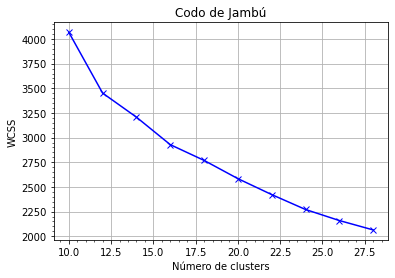

In [4]:
#Graficar los datos de la técnica del codo de Jambú del rango 10 a 30
plt.plot(range(10,30,2),wcss[0:10],'bx-')
plt.grid()
plt.minorticks_on()
plt.title("Codo de Jambú")
plt.xlabel("Número de clusters")
plt.ylabel("WCSS")
plt.show()

### Ahora volvemos a realizar la prueba con el nuevo rango, pero ahora haciendo uso de una segunda técnica

In [5]:
# Creamos una lista que guardará todos los nuevos valores de WCSS
wcss_2 = []

#Creamos una lista que guardará la silueta promedio de las observaciones
#(Éste este sirve para determinar que tan similar es un datos con respecto a los otros datos que se encuentren en su mismo grupo)
silueta = []

#Bucle que se encargará de probar los con diferentes cantidades de clusters
for i in range(10,30):
   modelo_prueba = KMeans(n_clusters = i, init = 'k-means++', random_state = 200).fit(datos)
   #Añadir el valor de wcss a la lista
   wcss_2.append(modelo_prueba.inertia_)

   #Agregar el valor de la silueta promedio a la lista
   silueta.append(silhouette_score(datos, modelo_prueba.labels_))

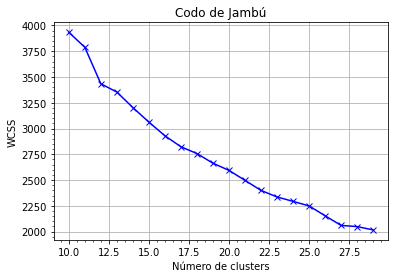

In [6]:
#Graficar los datos de la técnica del codo de Jambú
plt.plot(range(10,30),wcss_2,'bx-')
plt.grid()
plt.minorticks_on()
plt.title("Codo de Jambú")
plt.xlabel("Número de clusters")
plt.ylabel("WCSS")
plt.show()

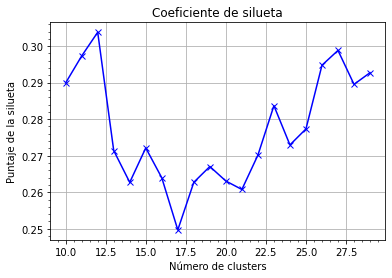

In [7]:
#Graficar los datos de la técnica del coeficiente de silueta
plt.plot(range(10,30),silueta,'bx-')
plt.grid()
plt.minorticks_on()
plt.title("Coeficiente de silueta")
plt.xlabel("Número de clusters")
plt.ylabel("Puntaje de la silueta")
plt.show()

## Conclusión
Con base a los datos y gráficas realizadas, he podido observar que la cantidad idónea de clusters a elegir se encuentra entre 11 y 15, pues aquí en donde la disminución del valor de wcss empieza a decaer de forma menos drástica, además de que se obtiene un coeficiente de silueta no tan bajo. Con esto dicho, he decidido optar por una cantidad de 11 clusters a fin de intentar reducir lo máximo posible los grupos en los que organizar los datos.

# Realizar metódo de K-Means Clustering

In [2]:
#Generar el modelo y aplicarlo a los datos
modelo = KMeans(n_clusters = 11, init = 'k-means++', random_state = 200).fit(datos)

In [3]:
#Guardar las agrupaciones en una variable
agrupacion_modelo = modelo.labels_

# Crear los parametros que pide la grafrica a utilizar

Para poder hacer esto es necesario tener en cuenta que la grafica a utilizar es un Diagrama de Sankey, el cual solicita el origen del dato y su destino como input.

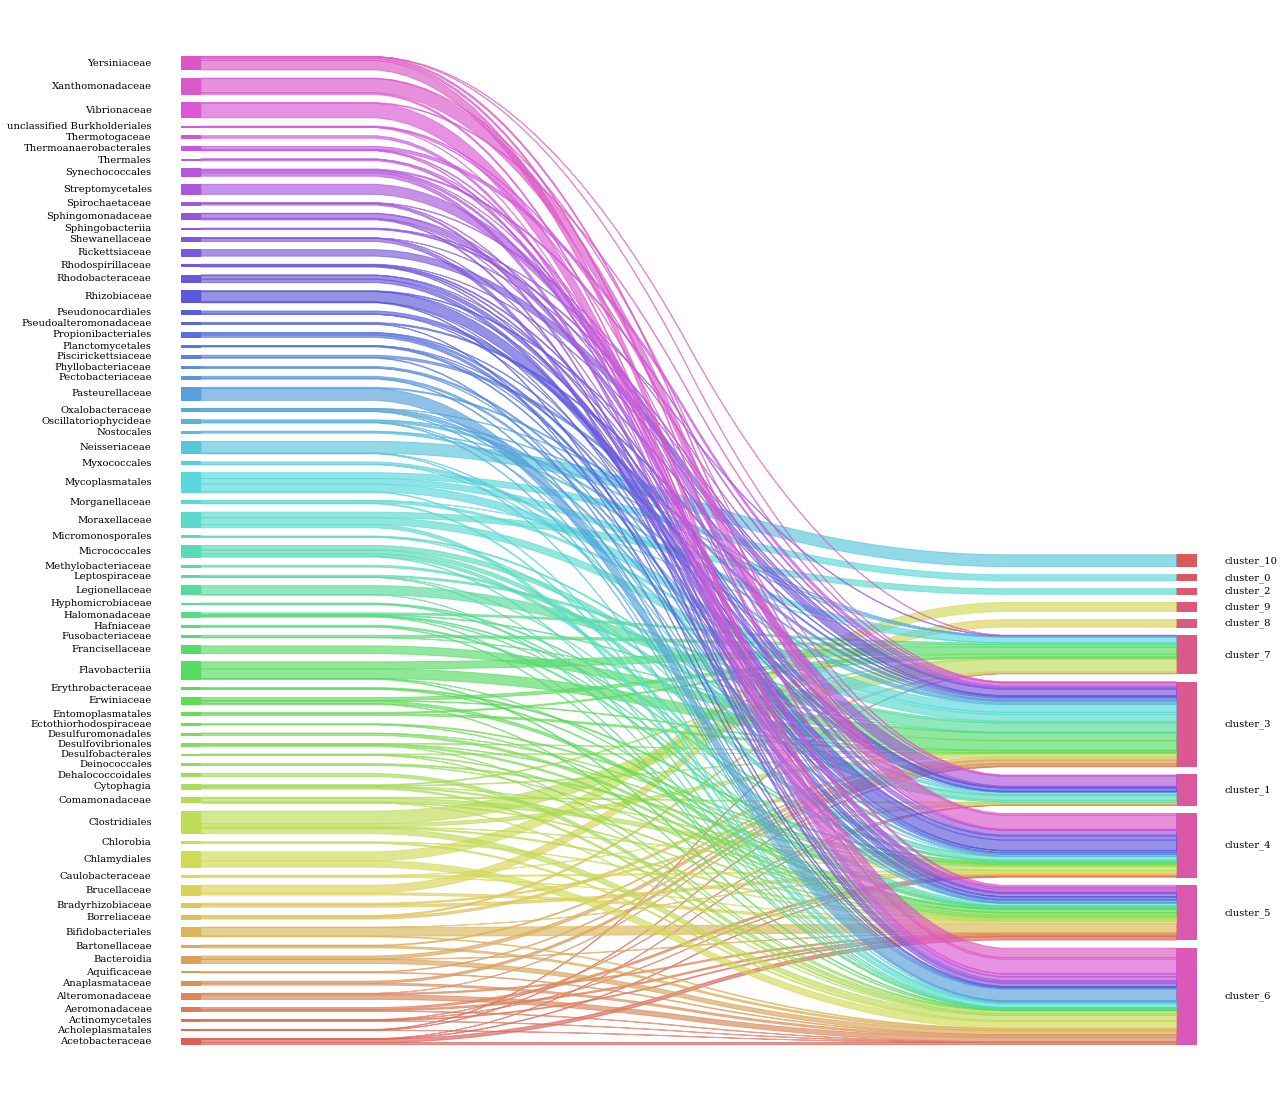

In [10]:
#Cargar archivo que contiene el nombre de las familias y la cantidad de datos que pertenecen a la misma
datos_familias = pd.read_csv('familiesName.txt', sep=';',header=None)
#Eliminar las columnas de datos que no nos servirán
datos_familias = datos_familias.drop(columns=range(2,6))

#Declara lista que contendrá el origen del dato
source=[]
#Declarar lista que contendrá el destino del dato
target=[]
#Declarar contador
contador_Registro = 0 # Ayuda a saber el registro que se esta manejando

#Recorrer toda la lista
for index, fila in datos_familias.iterrows():
    #Iterar según el número de veces que se repite el dato
    for i in range(fila[1]):
        # Generar una entrada en la lista del origen del dato
        source.append(fila[0])
        # Generar una entrada en la lista del destino del dato
        target.append("cluster_"+ str(agrupacion_modelo[contador_Registro]))
        #Aumentar en uno el contador
        contador_Registro += 1

#Pasar datos a la función y generar la grafica
sankey(source,target,aspect=20,fontsize=10)
plt.gcf().set_size_inches(20,20)

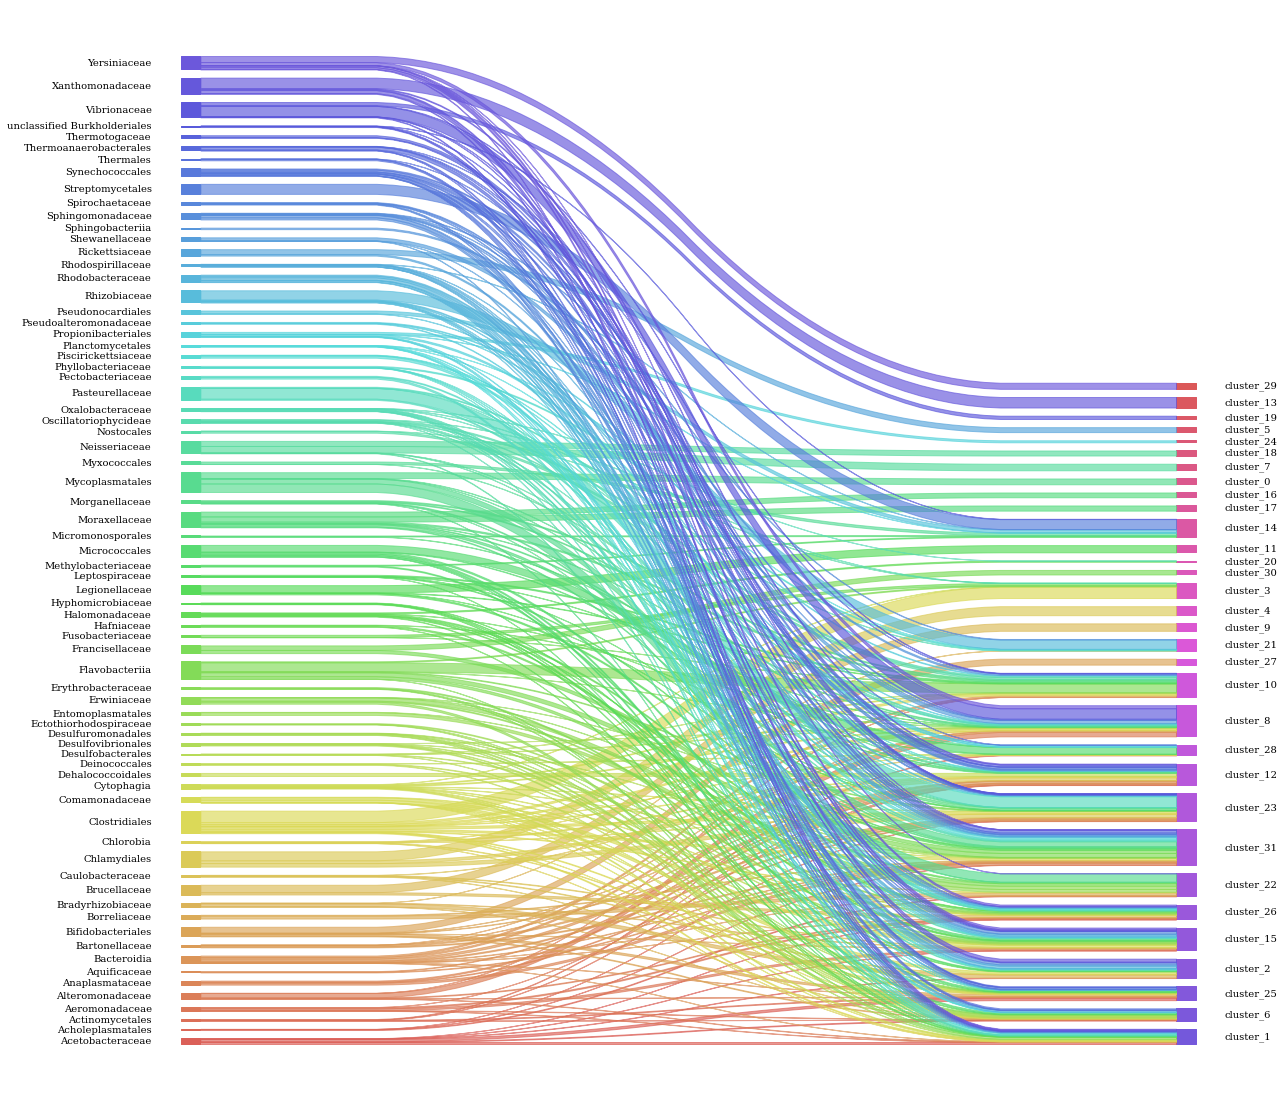

In [6]:
#Cargar archivo que contiene el nombre de las familias y la cantidad de datos que pertenecen a la misma
datos_familias = pd.read_csv('familiesName.txt', sep=';',header=None)
#Eliminar las columnas de datos que no nos servirán
datos_familias = datos_familias.drop(columns=range(2,6))

#Declara lista que contendrá el origen del dato
source=[]
#Declarar lista que contendrá el destino del dato
target=[]
#Declarar contador
contador_Registro = 0 # Ayuda a saber el registro que se esta manejando

#Recorrer toda la lista
for index, fila in datos_familias.iterrows():
    #Iterar según el número de veces que se repite el dato
    for i in range(fila[1]):
        # Generar una entrada en la lista del origen del dato
        source.append(fila[0])
        # Generar una entrada en la lista del destino del dato
        target.append("cluster_"+ str(agrupacion_modelo[contador_Registro]))
        #Aumentar en uno el contador
        contador_Registro += 1

#Pasar datos a la función y generar la grafica
sankey(source,target,aspect=20,fontsize=10)
plt.gcf().set_size_inches(20,20)

In [5]:
#Guardar las agrupaciones en una variable
agrupacion_modelo = modelo.labels_

In [4]:
#Generar el modelo y aplicarlo a los datos
modelo = KMeans(n_clusters = 32, init = 'k-means++', random_state = 200).fit(datos)